## Read .ghg metadata

In [140]:
import preProcessing
import importlib
import time
importlib.reload(preProcessing)
T1 = time.time()

for m in range(6,13):
    pr = preProcessing.read_ALL('BBS',2023,m,processes=8,file_type='dat')

for m in range(1,3):
    pr = preProcessing.read_ALL('BBS',2024,m,processes=8,file_type='dat')#,copy_From="X:\\BBS\\EC_Station\\2024\\",copy_tag='FLUX')

# y = 2023
# m = 6
# pr = preProcessing.read_ALL('BB',y,m,processes=8,file_type='ghg',copy_From=f"Y:\\BB\\raw\\{y}\\{str(m).zfill(2)}\\")


T2 = time.time()

print('\n')
print('Runtime: ',(T2-T1)/60,' minutes')


Preprocessing 2023 06[████████████████████████████████████████████████████████████] 784/784

Preprocessing 2023 07[████████████████████████████████████████████████████████████] 1485/1485

Preprocessing 2023 08[████████████████████████████████████████████████████████████] 1035/1035

Preprocessing 2023 09[████████████████████████████████████████████████████████████] 739/739

Preprocessing 2023 10[████████████████████████████████████████████████████████████] 1488/1488

Preprocessing 2023 11[████████████████████████████████████████████████████████████] 1419/1419

Preprocessing 2024 02[████████████████████████████████████████████████████████████] 910/910



Runtime:  7.514209481080373  minutes


In [6]:
import setupEP as eP
import importlib
import time
importlib.reload(eP)

########## Note - incomplete ghg or biomet files can crash program (preprocessing procedures should help prevent that by re-naming incomplete files)

T1 = time.time()
mR = eP.makeRun('ep_Templates/DefaultSettings.eddypro','BBS',Processes=6,priority = 'high priority')

# mR.runDates(['2023-06-01 00:00','2023-06-30 23:59'])
mR.runDates(['2023-01-01 00:00','2024-02-26 23:59'])
T2 = time.time()
print('\n')
print('Runtime: ',(T2-T1)/60)

Splitting into 4 batches due to update metadata
Running EddyPro[████████████████████████████████████████████████████████████] 24/24

Runtime:  57.93737214406331


## Full Runtime

### Reading & Writing all to Y: drive:

1 Month of BB data (20 hz)

**Preprocessing**: 3.91 minutes (8 cores)
**Processing**: 56.92 minutes (6 cores)

Total: **60.83** minutes

### Reading & Preprocessing on Y: drive then writing EddyPro results locally:

1 Month of BB data (20 hz)

**Preprocessing**: 3.91 minutes (8 cores)
**Processing**: 55.74 minutes (6 cores)

Total: **59.65** minutes

### Copying data to C then writing EddyPro results locally:

1 Month of BB data (20 hz)

**Preprocessing**: 6.30 minutes (1 core copy > 8 core preprocessing)

**Processing**: 54.33 minutes (6 cores)

Total: **60.3** minutes

* Paralellizing data copy could shave enought time to get marginal benfit, but doesn't look to matter much

,wind_speed,u*,wind_dir,Ta_1_1_1,H
TIMESTAMP,,,,,
2023-08-16 22:30:00,0.736949,0.161242,221.6520,17.49740,-50.9067
2023-09-18 03:00:00,1.770440,0.280402,176.1550,12.04650,-20.8196
2023-10-09 16:00:00,1.775180,0.260063,33.1475,13.49510,-10.4223
2023-11-09 22:00:00,2.330620,0.354012,90.3921,7.34953,-36.9295
2023-11-10 18:30:00,3.288600,0.590838,57.9467,7.67253,-68.6438
2023-11-10 21:00:00,4.120500,0.753196,60.1926,7.77312,-98.8908
2023-11-10 21:30:00,5.073780,0.899394,61.2620,7.66576,-109.8260
2023-11-11 01:30:00,7.212230,1.231940,68.0636,8.34353,-130.9210


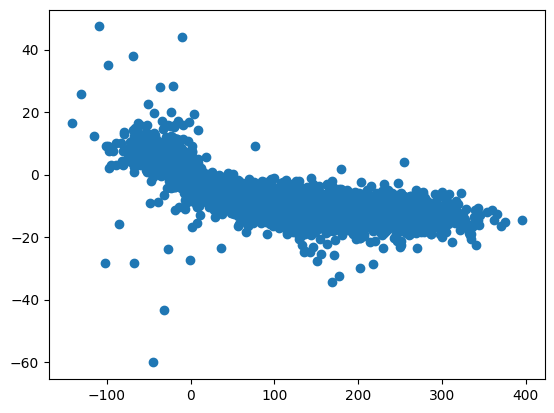

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv(mR.all_outputs['fulloutput'],skiprows=[0,2],na_values=-9999,parse_dates={'TIMESTAMP':['date','time']},index_col='TIMESTAMP')
bm = pd.read_csv(mR.all_outputs['biomet'],skiprows=[1],na_values=-9999,parse_dates={'TIMESTAMP':['date','time']},index_col='TIMESTAMP')

df = pd.concat([df,bm[['RH_1_1_1','Ta_1_1_1','Rg_1_1_1','LWIN_1_1_1']]],axis=1)
df.loc[df['qc_co2_flux']>0,'co2_flux']=np.nan
df.loc[df['u*']<0.15,'co2_flux']=np.nan

plt.scatter(df['H'],df['co2_flux'])

df.loc[df['co2_flux']>20,['wind_speed','u*','wind_dir','Ta_1_1_1','H']]

# df['co2_flux'].quantile([.05,.95])

# plt.scatter(df['co2_flux'],(df['co2_flux']-df['co2_flux'].mean())/df['co2_flux'].std())
# bm[bm.duplicated(keep=False)].sort_index()

# Speedtests

All times in minutes

### 4 threads (8 timesteps each)

Normal priority: 2.05
High priority: 1.91

### 4 threads (48 timesteps each x 12 days)

High priority: 29

### Eddypro GUI (1 run [12 days, 576 timesteps])

High priority: 90